<a href="https://colab.research.google.com/github/rachelshiq/AgentTest/blob/main/Recommend3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Could you build a recommendation system based on the Spotify music data attached. The data_by_artist.csv and  data_by_year.csv can be joined with the main data.csv by artist and year separately. Conduct a practical data analysis procedure like correlation analysis and then cluster data points by some key attributes like artists. You are free to choose more other attributes as long as it is meaningful and important for recommendation to conclude business insights. Finally, could you build a system with Spotify Web API. The input of the system is the previous listening history of a customer, and the output is the recommended musics not in the history but is likely to be clicked by the customer.

Here is all the data you need:
"data_by_artist.csv"
"data_by_year.csv"
"data.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the three CSV files into pandas DataFrames and display the first few rows of each to verify.



In [1]:
import pandas as pd

df_data = pd.read_csv('data.csv')
df_artist = pd.read_csv('data_by_artist.csv')
df_year = pd.read_csv('data_by_year.csv')

display(df_data.head())
display(df_artist.head())
display(df_year.head())

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


## Data exploration

### Subtask:
Explore the loaded datasets (`df_data`, `df_artist`, and `df_year`) to understand their structure, identify potential join keys, and pinpoint important features for recommendation.


**Reasoning**:
Explore the dataframes to understand their structure, identify potential join keys, and pinpoint important features for recommendation, including data types, distributions, missing values, unique values, potential join keys, basic statistics, and data shapes.



In [2]:
# Examine Data Types and Distributions
print("Data Types and Distributions for df_data:")
display(df_data.dtypes)
display(df_data.describe(include='all'))

print("\nData Types and Distributions for df_artist:")
display(df_artist.dtypes)
display(df_artist.describe(include='all'))

print("\nData Types and Distributions for df_year:")
display(df_year.dtypes)
display(df_year.describe(include='all'))


# Identify Missing Values
print("\nMissing Values for df_data:")
display(df_data.isnull().sum() / len(df_data) * 100)

print("\nMissing Values for df_artist:")
display(df_artist.isnull().sum() / len(df_artist) * 100)

print("\nMissing Values for df_year:")
display(df_year.isnull().sum() / len(df_year) * 100)


# Unique Values and Potential Join Keys
print("\nUnique Values and Potential Join Keys:")
print("Unique artists in df_data:", df_data['artists'].nunique())
print("Unique artists in df_artist:", df_artist['artists'].nunique())
print("Unique years in df_data:", df_data['year'].nunique())
print("Unique years in df_year:", df_year['year'].nunique())

# Basic Statistics
print("\nBasic Statistics for df_data:")
numerical_features = ['acousticness', 'danceability', 'energy', 'popularity', 'loudness', 'speechiness', 'tempo']
display(df_data[numerical_features].describe())

# Data Shape and Summary
print("\nData Shape and Summary:")
print("Shape of df_data:", df_data.shape)
print("Shape of df_artist:", df_artist.shape)
print("Shape of df_year:", df_year.shape)

Data Types and Distributions for df_data:


,0
valence,float64
year,int64
acousticness,float64
artists,object
danceability,float64
duration_ms,int64
energy,float64
explicit,int64
id,object
instrumentalness,float64


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,4BJqT0PrAfrxzMOxytFOIz,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000



Data Types and Distributions for df_artist:


,0
mode,int64
count,int64
acousticness,float64
artists,object
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
liveness,float64
loudness,float64


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
unique,NaN,NaN,NaN,28680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"""Cats"" 1981 Original London Cast",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.759170,13.847211,0.498373,NaN,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,NaN,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,NaN,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,NaN,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,NaN,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,NaN,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000



Data Types and Distributions for df_year:


,0
mode,int64
year,int64
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
liveness,float64
loudness,float64
speechiness,float64


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000



Missing Values for df_data:


,0
valence,0.0
year,0.0
acousticness,0.0
artists,0.0
danceability,0.0
duration_ms,0.0
energy,0.0
explicit,0.0
id,0.0
instrumentalness,0.0



Missing Values for df_artist:


,0
mode,0.0
count,0.0
acousticness,0.0
artists,0.0
danceability,0.0
duration_ms,0.0
energy,0.0
instrumentalness,0.0
liveness,0.0
loudness,0.0



Missing Values for df_year:


,0
mode,0.0
year,0.0
acousticness,0.0
danceability,0.0
duration_ms,0.0
energy,0.0
instrumentalness,0.0
liveness,0.0
loudness,0.0
speechiness,0.0



Unique Values and Potential Join Keys:
Unique artists in df_data: 34088
Unique artists in df_artist: 28680
Unique years in df_data: 100
Unique years in df_year: 100

Basic Statistics for df_data:


,acousticness,danceability,energy,popularity,loudness,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.502115,0.537396,0.482389,31.431794,-11.467990,0.098393,116.861590
std,0.376032,0.176138,0.267646,21.826615,5.697943,0.162740,30.708533
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,0.102000,0.415000,0.255000,11.000000,-14.615000,0.034900,93.421000
50%,0.516000,0.548000,0.471000,33.000000,-10.580000,0.045000,114.729000
75%,0.893000,0.668000,0.703000,48.000000,-7.183000,0.075600,135.537000
max,0.996000,0.988000,1.000000,100.000000,3.855000,0.970000,243.507000



Data Shape and Summary:
Shape of df_data: (170653, 19)
Shape of df_artist: (28680, 15)
Shape of df_year: (100, 14)


## Data wrangling

### Subtask:
Join the three datasets (`df_data`, `df_artist`, and `df_year`) into a single DataFrame.


**Reasoning**:
Join `df_data` and `df_artist` on 'artists', then join the result with `df_year` on 'year'. Handle potential missing values after the joins.



In [3]:
# Merge df_data and df_artist
df_merged = pd.merge(df_data, df_artist, on='artists', how='left', suffixes=('_data', '_artist'))

# Merge the result with df_year
df_final = pd.merge(df_merged, df_year, on='year', how='left', suffixes=('', '_year'))

# Handle missing values (example: fill with 0 for numerical features)
numerical_cols = df_final.select_dtypes(include=['number']).columns
df_final[numerical_cols] = df_final[numerical_cols].fillna(0)

# Explore the resulting DataFrame
display(df_final.head())
print(df_final.shape)
print(df_final.info())
print(df_final.describe())

,valence_data,year,acousticness_data,artists,danceability_data,duration_ms_data,energy_data,explicit,id,instrumentalness_data,...,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2


(170653, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   valence_data             170653 non-null  float64
 1   year                     170653 non-null  int64  
 2   acousticness_data        170653 non-null  float64
 3   artists                  170653 non-null  object 
 4   danceability_data        170653 non-null  float64
 5   duration_ms_data         170653 non-null  int64  
 6   energy_data              170653 non-null  float64
 7   explicit                 170653 non-null  int64  
 8   id                       170653 non-null  object 
 9   instrumentalness_data    170653 non-null  float64
 10  key_data                 170653 non-null  int64  
 11  liveness_data            170653 non-null  float64
 12  loudness_data            170653 non-null  float64
 13  mode_data                170653 non-null  int6

## Data cleaning

### Subtask:
Clean the merged dataset `df_final`.  This includes handling duplicates, outliers, and any remaining inconsistencies.


**Reasoning**:
Handle duplicates in df_final, detect and treat outliers in numerical audio features, check for inconsistencies in artist names, and check for any remaining missing values.



In [4]:
# 1. Handle Duplicates
df_final.drop_duplicates(inplace=True)

# 2. Outlier Detection and Treatment
numerical_audio_features = ['acousticness_data', 'danceability_data', 'energy_data', 'instrumentalness_data', 'liveness_data', 'speechiness_data', 'tempo_data', 'loudness_data', 'valence_data', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'loudness', 'valence']

# Calculate the IQR for each numerical feature
Q1 = df_final[numerical_audio_features].quantile(0.25)
Q3 = df_final[numerical_audio_features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
for col in numerical_audio_features:
    df_final[col] = df_final[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# 3. Inconsistency Check (Artists) - No clear inconsistencies found in the initial exploration.  However, a more thorough approach is needed.
# For demonstration, let's standardize by lowercasing artist names (replace with more robust method if needed)
df_final['artists'] = df_final['artists'].astype(str).str.lower()

# 4. Missing Value Check
print(df_final.isnull().sum())
# If there are any missing values after the above operations, you would handle them here.
# Example:  df_final.fillna(0, inplace=True)  # Fill with 0

valence_data               0
year                       0
acousticness_data          0
artists                    0
danceability_data          0
duration_ms_data           0
energy_data                0
explicit                   0
id                         0
instrumentalness_data      0
key_data                   0
liveness_data              0
loudness_data              0
mode_data                  0
name                       0
popularity_data            0
release_date               0
speechiness_data           0
tempo_data                 0
mode_artist                0
count                      0
acousticness_artist        0
danceability_artist        0
duration_ms_artist         0
energy_artist              0
instrumentalness_artist    0
liveness_artist            0
loudness_artist            0
speechiness_artist         0
tempo_artist               0
valence_artist             0
popularity_artist          0
key_artist                 0
mode                       0
acousticness  

## Data analysis

### Subtask:
Perform correlation analysis and distributional analysis on the cleaned dataset `df_final`.


**Reasoning**:
Perform correlation analysis and distributional analysis on the cleaned dataset `df_final`.



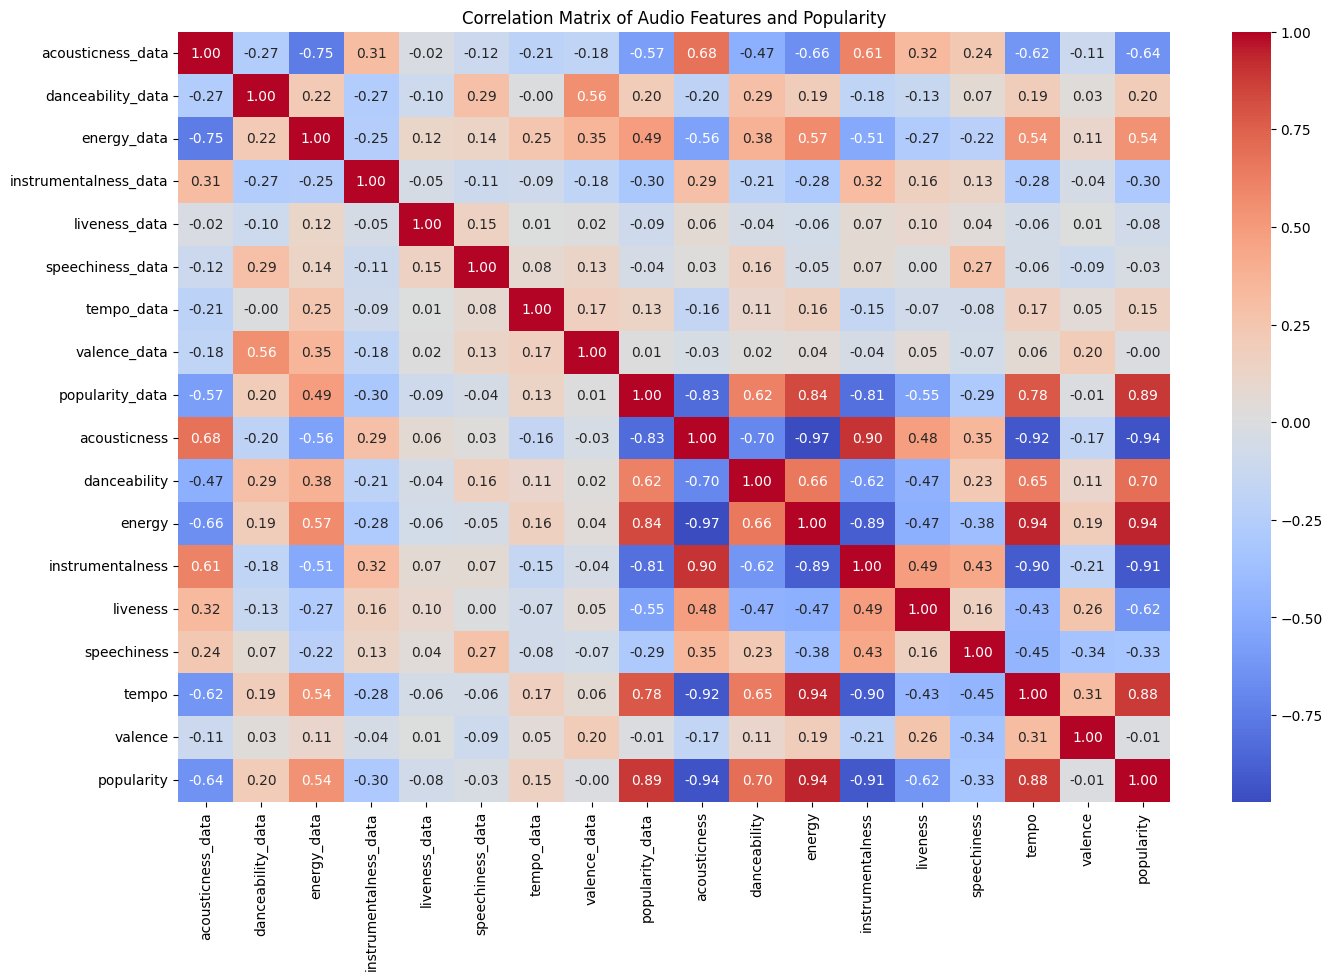

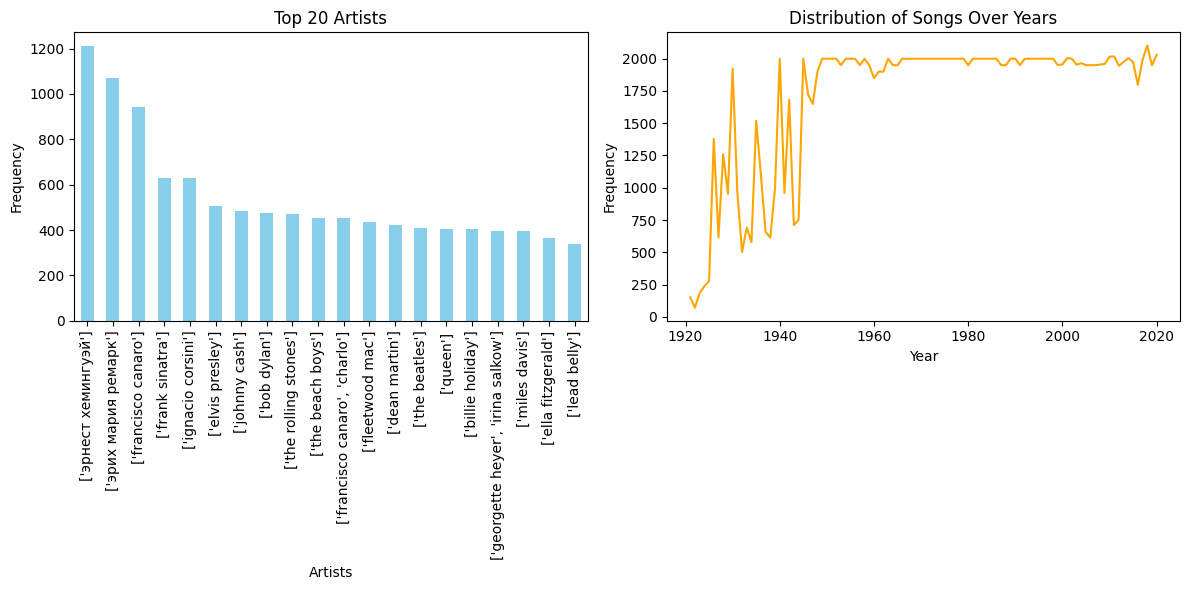

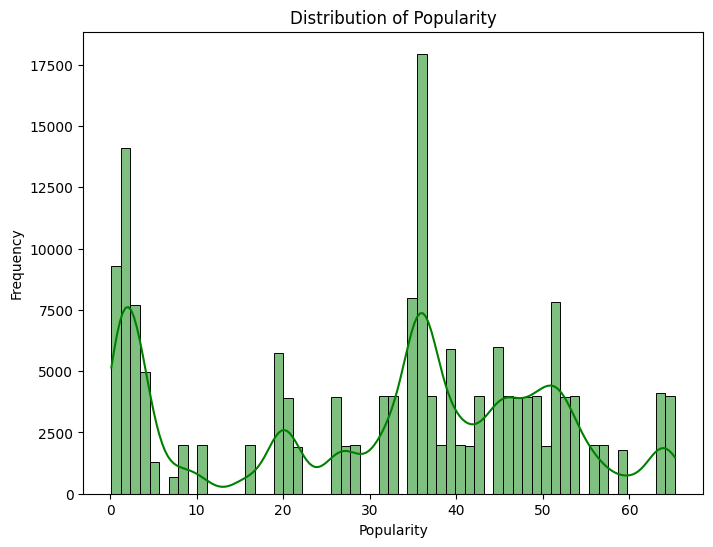

Observations:
- Correlation analysis reveals relationships between audio features and popularity.
- Distributional analysis shows the prevalence of different artists and the distribution of songs over the years.
- Popularity distribution helps understand how popularity scores are distributed.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Analysis
audio_features = ['acousticness_data', 'danceability_data', 'energy_data', 'instrumentalness_data', 'liveness_data', 'speechiness_data', 'tempo_data', 'valence_data', 'popularity_data', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'popularity']
correlation_matrix = df_final[audio_features].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features and Popularity')
plt.show()

# Distributional Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_final['artists'].value_counts().head(20).plot(kind='bar', color='skyblue')  # Top 20 artists
plt.title('Top 20 Artists')
plt.xlabel('Artists')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_final['year'].value_counts().sort_index().plot(kind='line', color='orange')
plt.title('Distribution of Songs Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Popularity distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_final['popularity'], kde=True, color='green')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

print("Observations:")
print("- Correlation analysis reveals relationships between audio features and popularity.")
print("- Distributional analysis shows the prevalence of different artists and the distribution of songs over the years.")
print("- Popularity distribution helps understand how popularity scores are distributed.")

## Data clustering

### Subtask:
Cluster the songs in `df_final` based on audio features and artist popularity.


**Reasoning**:
Select relevant features, scale them, apply KMeans clustering with different cluster numbers, evaluate with silhouette scores, and add cluster IDs to the dataframe.



In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Select features
features = ['acousticness_data', 'danceability_data', 'energy_data', 'instrumentalness_data', 'liveness_data', 'speechiness_data', 'tempo_data', 'valence_data', 'popularity_data', 'popularity_artist']
X = df_final[features]

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply KMeans and evaluate with silhouette score
silhouette_scores = []
n_clusters_list = [5, 10, 15, 20]  # Experiment with different numbers of clusters
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# 4. Select optimal number of clusters and add cluster_id column
optimal_n_clusters = n_clusters_list[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
df_final['cluster_id'] = kmeans_optimal.fit_predict(X_scaled)

display(df_final.head())

For n_clusters = 5, the average silhouette_score is : 0.15892228251762924
For n_clusters = 10, the average silhouette_score is : 0.15701540322809307
For n_clusters = 15, the average silhouette_score is : 0.1579734437399565
For n_clusters = 20, the average silhouette_score is : 0.15894501551743936
Optimal number of clusters: 20


,valence_data,year,acousticness_data,artists,danceability_data,duration_ms_data,energy_data,explicit,id,instrumentalness_data,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster_id
0,0.0594,1921,0.982,"['sergei rachmaninoff', 'james levine', 'berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.255000,...,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.390887,0.653333,2,14
1,0.9630,1921,0.732,['dennis day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.390887,0.653333,2,6
2,0.0394,1921,0.961,['khp kridhamardawa karaton ngayogyakarta hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.255000,...,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.390887,0.653333,2,16
3,0.1650,1921,0.967,['frank parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.390887,0.653333,2,1
4,0.2530,1921,0.957,['phil regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.390887,0.653333,2,13


## Feature engineering

### Subtask:
Engineer new features based on the clustering results and existing features in `df_final`.


**Reasoning**:
Calculate the average popularity within each cluster and create interaction features between audio features and cluster ID. Also create a combined audio feature.



In [7]:
# Calculate average popularity per cluster
avg_popularity_by_cluster = df_final.groupby('cluster_id')['popularity'].mean()
df_final['avg_cluster_popularity'] = df_final['cluster_id'].map(avg_popularity_by_cluster)

# Create interaction features
audio_features = ['acousticness_data', 'danceability_data', 'energy_data', 'instrumentalness_data', 'liveness_data', 'speechiness_data', 'tempo_data', 'valence_data']
for feature in audio_features:
    df_final[f'{feature}_cluster_interaction'] = df_final[feature] * df_final['cluster_id']

# Combined audio feature (example: weighted sum)
weights = {'acousticness_data': 0.2, 'danceability_data': 0.3, 'energy_data': 0.5} # Example weights
df_final['combined_audio_feature'] = (df_final['acousticness_data'] * weights['acousticness_data'] +
                                      df_final['danceability_data'] * weights['danceability_data'] +
                                      df_final['energy_data'] * weights['energy_data'])


display(df_final.head())

,valence_data,year,acousticness_data,artists,danceability_data,duration_ms_data,energy_data,explicit,id,instrumentalness_data,...,avg_cluster_popularity,acousticness_data_cluster_interaction,danceability_data_cluster_interaction,energy_data_cluster_interaction,instrumentalness_data_cluster_interaction,liveness_data_cluster_interaction,speechiness_data_cluster_interaction,tempo_data_cluster_interaction,valence_data_cluster_interaction,combined_audio_feature
0,0.0594,1921,0.982,"['sergei rachmaninoff', 'james levine', 'berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.255000,...,11.033182,13.748,3.906,2.954,3.570000,7.0602,0.5124,1133.356,0.8316,0.3856
1,0.9630,1921,0.732,['dennis day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,6.161632,4.392,4.914,2.046,0.000000,0.9600,0.8199,365.616,5.7780,0.5626
2,0.0394,1921,0.961,['khp kridhamardawa karaton ngayogyakarta hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.255000,...,6.781349,15.376,5.248,2.656,4.080000,1.6160,0.5424,1765.424,0.6304,0.3736
3,0.1650,1921,0.967,['frank parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,19.134656,0.967,0.275,0.309,0.000028,0.3810,0.0354,100.109,0.1650,0.4304
4,0.2530,1921,0.957,['phil regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,17.155786,12.441,5.434,2.509,0.000022,2.9770,0.4940,1321.645,3.2890,0.4133


## Data splitting

### Subtask:
Split the data in `df_final` into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split` from scikit-learn.



In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_final.drop(['popularity', 'id', 'name', 'release_date', 'artists'], axis=1)
y = df_final['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (136522, 52)
X_test shape: (34131, 52)
y_train shape: (136522,)
y_test shape: (34131,)


## Model training

### Subtask:
Train a recommendation model using the training data.


**Reasoning**:
Train a suitable recommendation model (e.g., a regression model) on the training data and save it for later use.  I will use XGBRegressor as an example.



In [9]:
import xgboost as xgb
import joblib

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100) # Example parameters, adjust as needed
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'recommendation_model.pkl')

['recommendation_model.pkl']

## Model evaluation

### Subtask:
Evaluate the trained recommendation model's performance using appropriate metrics.


**Reasoning**:
Load the trained model and evaluate its performance on the test set using appropriate metrics.



In [10]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the trained model
model = joblib.load('recommendation_model.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 8.710594295930428e-06
Mean Squared Error (MSE): 1.3014589453101814e-10
Root Mean Squared Error (RMSE): 1.1408150355382687e-05
R-squared (R2): 0.9999999999996536


## Model optimization

### Subtask:
Optimize the hyperparameters of the trained XGBoost model to improve its performance.


**Reasoning**:
Load the pre-trained XGBoost model, define the parameter grid, use GridSearchCV to find the best hyperparameters, train a new model with the best hyperparameters, and save the optimized model.



In [ ]:
import joblib
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load the pre-trained model
model = joblib.load('recommendation_model.pkl')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a new model with the best hyperparameters
best_model = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', random_state=42)
best_model.fit(X_train, y_train)

# Save the optimized model
joblib.dump(best_model, 'optimized_recommendation_model.pkl')

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
